In [43]:
import warnings
warnings.filterwarnings('ignore')

import keras
import matplotlib.pyplot as plt # for plotting
import os # provides a way of using operating system dependent functionality
import cv2 #Image handling library
import numpy as np

# Import of keras model and hidden layers for our convolutional network
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [44]:
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten, Dropout


In [45]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50


In [46]:
# paths for dataset
data_path = r"C:\Users\cheth\OneDrive\Desktop\prodigy internship\Untitled Folder\leapGestRecog\leapGestRecog"

In [47]:
# Loading the images and their class(0 - 9)
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [51]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)


In [52]:
label[:10]


[0, 3, 7, 3, 4, 3, 2, 8, 2, 5]

In [53]:
# shuffle the input data
import random
random.shuffle(image_data)

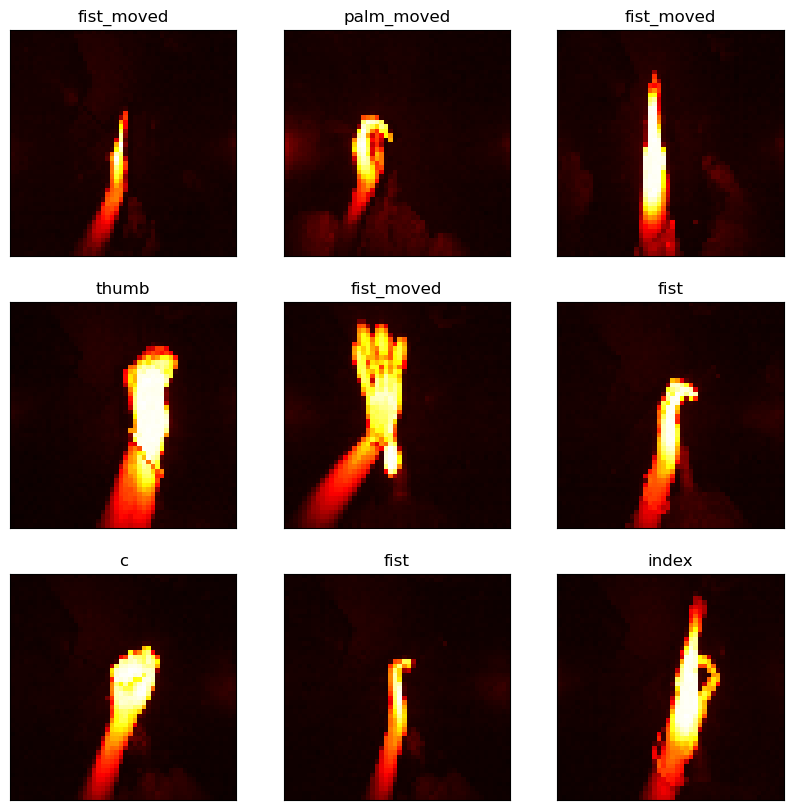

In [54]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [55]:
X = []
y = []

for features, label in image_data:
    X.append(features)
    y.append(label)

# Convert to numpy array and normalize
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
y = np.array(y)

# One-hot encode labels
y = to_categorical(y, num_classes=len(CATEGORIES))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), input_shape=(IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convolutional Layer
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully Connected Layer
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# Output Layer
model.add(Dense(len(CATEGORIES)))
model.add(Activation('softmax'))

# Compile the Model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/10
400/400 [==============================] - 22s 49ms/step - loss: 0.5412 - accuracy: 0.8155 - val_loss: 0.0479 - val_accuracy: 0.9837
Epoch 2/10
400/400 [==============================] - 18s 46ms/step - loss: 0.0537 - accuracy: 0.9835 - val_loss: 0.0062 - val_accuracy: 0.9984
Epoch 3/10
400/400 [==============================] - 20s 49ms/step - loss: 0.0271 - accuracy: 0.9922 - val_loss: 0.0046 - val_accuracy: 0.9987
Epoch 4/10
400/400 [==============================] - 17s 42ms/step - loss: 0.0210 - accuracy: 0.9942 - val_loss: 0.0035 - val_accuracy: 0.9991
Epoch 5/10
400/400 [==============================] - 16s 39ms/step - loss: 0.0144 - accuracy: 0.9966 - val_loss: 0.0043 - val_accuracy: 0.9987
Epoch 6/10
400/400 [==============================] - 17s 42ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0025 - val_accuracy: 0.9991
Epoch 7/10
400/400 [==============================] - 16s 39ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 0.0062 - val_accuracy:

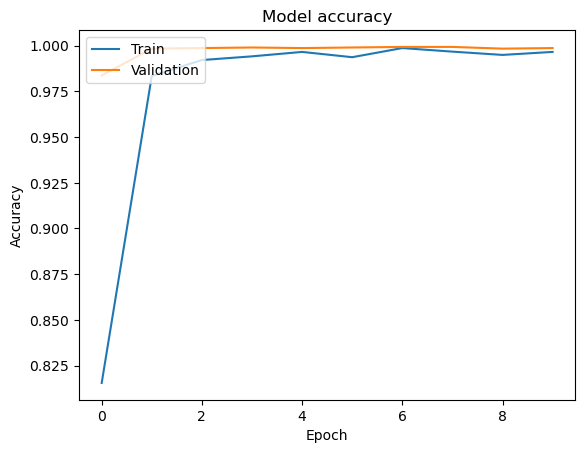

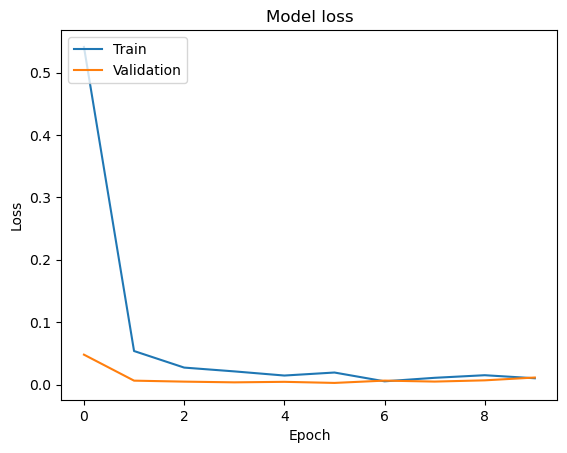

In [57]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [58]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')


125/125 [==============================] - 2s 15ms/step - loss: 3.5085e-04 - accuracy: 1.0000
Test loss: 0.0003508522640913725
Test accuracy: 1.0


In [59]:
# Save the model
model.save('hand_gesture_recognition_model.h5')


In [60]:
from keras.models import load_model

# Load the saved model
model = load_model('hand_gesture_recognition_model.h5')

# Function to predict gesture
def predict_gesture(image):
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE)).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
    prediction = model.predict(image)
    return CATEGORIES[np.argmax(prediction)]
